In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
import tensorflow as tf

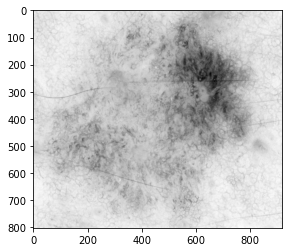

In [4]:
DATADIR = "C:\\Users\\User\\Desktop\\ISIC-Archive" #INSERT DIRECTORY
CATEGORIES = ["Nevus", "Melanoma"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), (cv2.IMREAD_GRAYSCALE))
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

In [5]:
print(img_array)

[[165 166 167 ... 174 174 175]
 [166 166 166 ... 174 174 174]
 [165 165 166 ... 174 173 172]
 ...
 [168 168 169 ... 169 169 169]
 [166 166 169 ... 167 166 167]
 [161 163 169 ... 166 164 164]]


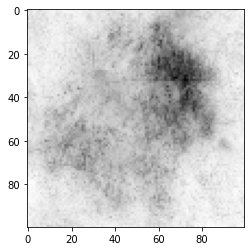

In [6]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        for img in (os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

In [8]:
create_training_data()

In [9]:
print(len(training_data))

9047


In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
0
1
0
0
0
0


In [12]:
X = []
y = []

In [13]:
for features, labels in training_data:
    X.append(features)
    y.append(labels)

In [14]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [16]:
X = X/255.0

In [17]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Epoch 1/3
198/198 [==============================] - 274s 1s/step - loss: 0.6695 - accuracy: 0.6933 - val_loss: 0.5228 - val_accuracy: 0.7385
Epoch 2/3
198/198 [==============================] - 251s 1s/step - loss: 0.5396 - accuracy: 0.7063 - val_loss: 0.5298 - val_accuracy: 0.7315
Epoch 3/3
198/198 [==============================] - 260s 1s/step - loss: 0.5270 - accuracy: 0.7220 - val_loss: 0.5493 - val_accuracy: 0.7168


In [18]:
def prepare(testpath):
    IMG_SIZE = 100  # 50 in txt-based
    img_array = cv2.imread(testpath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with sha

In [19]:
prediction = model.predict([prepare('C:/Users/User/Desktop/ISIC-Archive/Nevus/Nevus-1.jpg')])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 195ms/step
Nevus


In [20]:
prediction = model.predict([prepare('C:/Users/User/Desktop/ISIC-Archive/Nevus/Nevus-2.jpg')])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 52ms/step
Nevus


In [21]:
prediction = model.predict([prepare('C:/Users/User/Desktop/ISIC-Archive/Melanoma/Melanoma-1.jpg')])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 52ms/step
Nevus


In [22]:
prediction = model.predict([prepare('C:/Users/User/Desktop/ISIC-Archive/Melanoma/Melanoma-2.jpg')])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 65ms/step
Nevus


In [ ]:
#NEEDS MORE TRAINING